# 필요 라이브러리 추가

In [8]:
import torch
import pickle
import matplotlib.pyplot as plt

# 오염된 이미지를 파이토치 텐서의 형태로 읽은 후 출력

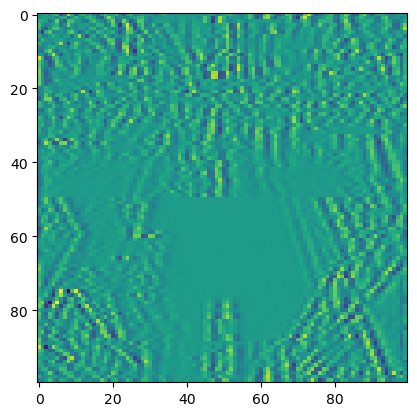

In [9]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))

# 이미지를 오염시키는 weird_function()함수

In [10]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3,1./3,-1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0 :
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]), 0)
    return h

# 무작위 텐서를 오염 함수에 넣은 결과 텐서와 오염된 이미지 사이의 오차를 구하는 함수

In [11]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

# Random 텐서 정의

In [12]:
random_tensor = torch.randn(10000, dtype=torch.float)

# 경사하강법에서 가중치의 변화량 정의, 즉 학습률 정의

In [13]:
lr = 0.8

# 경사하강법으로 가중치 계산

In [20]:
for i in range(0,5000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 0.02116985432803631
Loss at 1000 = 0.02116980217397213
Loss at 2000 = 0.021169597283005714
Loss at 3000 = 0.021169548854231834
Loss at 4000 = 0.021169623360037804


# random_tensor의 복원 결과 출력

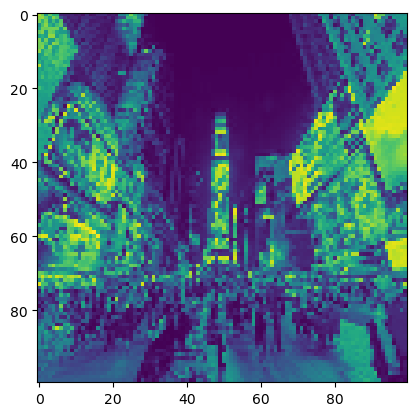

In [21]:
plt.imshow(random_tensor.view(100, 100).data)